# Catena Elettronica Completa Data Analysis

***
***

## TO DO LIST

- [x] Associare un errore alle misure dirette
- [x] Calcolare le stime teoriche delle quantità rilevanti
- [ ] Controllare che l'apparato sperimentale risponda secondo le aspettative
- [x] Verificare la linearità della catena elettronica
- [x] Stimo la frequenza di taglio della risposta in frequenza con _THEBODE_
- [ ] Verifico che tale stima sia compatibile con le aspettative

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from jupyterthemes import jtplot
jtplot.reset()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import importlib
import Catena_Analysis_Code as CA

In [17]:
importlib.reload(CA)

<module 'Catena_Analysis_Code' from 'd:\\GitHub\\physics_laboratory_2020_2021\\CATENA ELETTRONICA\\Python\\Catena_Analysis_Code.py'>

In [4]:
componenti = CA.misure_dirette()
componenti

,Valore,Errore,FS
R1a,9.982 kΩ,0.006 kΩ,100 kΩ
R2a,82.39 kΩ,0.03 kΩ,100 kΩ


In [5]:
CA.get_G_th()
CA.get_Vshaper_sper()
CA.get_Vcatena_th()
CA.get_Vcatena_sper()
CA.get_Vcatena_comp()

Amplificazione teorica   G = 9.254 +/- 0.004
V_shaper_sper = 0.260 +/- 0.004
V_catena_th = 2.41 +/- 0.04
V_catena_sper = 2.32 +/- 0.04
Compatibilità λ = 1.51


## Verifica della Linearità della Catena Elettronica

***

In [18]:
data = CA.make_dataframe()
CA.max_values_calib(data)
data

,max_values,charge,err_charge,V (V),err V (V)
0,1418,35.994626,0.889840,0.524641,0.022236
1,1728,53.991938,1.334760,0.776794,0.026063
2,2046,71.989251,1.779680,1.035455,0.030113
3,2367,89.986564,2.224600,1.296555,0.034283
4,2688,107.983877,2.669521,1.557656,0.038509
5,3006,125.981189,3.114441,1.816316,0.042734
6,3329,143.978502,3.559361,2.079043,0.047054
7,3654,161.975815,4.004281,2.343397,0.051422
8,3980,179.973128,4.449201,2.608565,0.055821


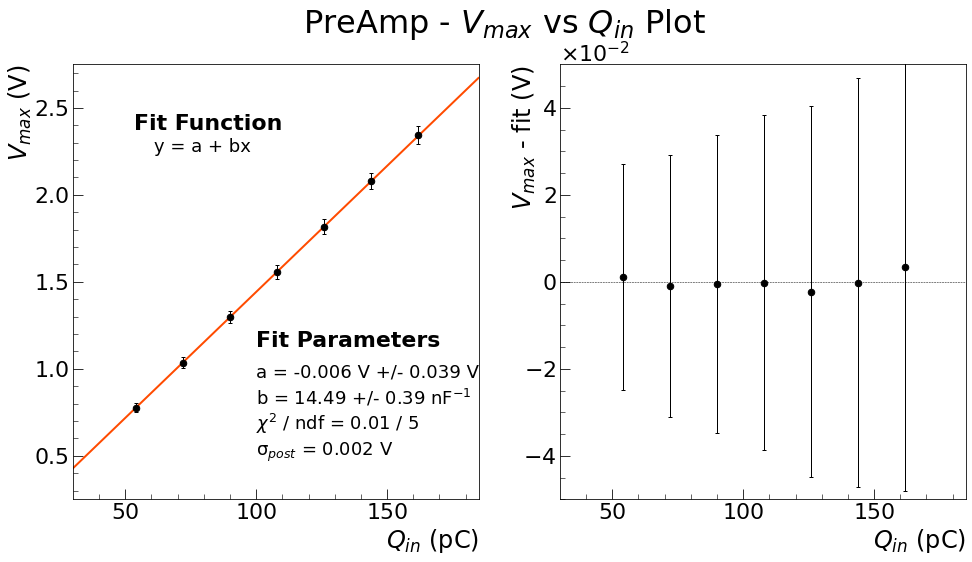

In [19]:
CA.linearity_plot(data)

C'è qualche problemino di calibrazione e di assegnazione degli errori... La linearità della catena è comunque verificata!

## Analisi in Frequenza &rarr; _THEBODE_

*** 

In [67]:
# READ DATA FROM FILE
data = CA.get_data('../Data/Catena/data_bode.txt')
data.columns = ['freq (Hz)', 'Vin (V)', 'Vout (V)', 'Vin/div', 'Vout/div']

# CALCOLO FUNZIONE DI TRASFERIMENTO ED ERRORE
data['T'] = data['Vout (V)'] / data['Vin (V)']
data['sigma T'] = CA.propagazione_T(data['T'], data['Vin (V)'], data['Vout (V)'], data['Vin/div'], data['Vout/div'])
data['sigma Tr'] = CA.propagazione_Tr(data['T'], data['Vin (V)'], data['Vout (V)'], data['Vin/div'], data['Vout/div'])

# CALCOLO I LOGARITMI PER BODE
data['log10f (dec)'] = np.log10(data['freq (Hz)'])
data['H (dB)'] = 20 * np.log10(data['T'])

# PROPAGO L'ERRORE AI LOGARITMI
data['sigma H (dB)'] = 20 * data['sigma T'] / ( data['T'] * np.log(10) )
data['sigma Hr (dB)'] = 20 * data['sigma Tr'] / ( data['T'] * np.log(10) )

data_out = data.drop(axis = 0, labels = 21) # tolgo un brutto outlier
data_out

,freq (Hz),Vin (V),Vout (V),Vin/div,Vout/div,T,sigma T,sigma Tr,log10f (dec),H (dB),sigma H (dB),sigma Hr (dB)
1,10,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,1.000000,20.084741,0.207707,0.095876
2,50,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,1.698970,20.084741,0.207707,0.095876
3,100,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,2.000000,20.084741,0.207707,0.095876
4,250,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,2.397940,20.084741,0.207707,0.095876
5,500,1.02,10.300,0.2,2.00,10.098039,0.241476,0.111464,2.698970,20.084741,0.207707,0.095876
6,1000,1.02,10.100,0.2,2.00,9.901961,0.237287,0.110376,3.000000,19.914424,0.208145,0.096821
7,2000,1.02,9.840,0.2,2.00,9.647059,0.231853,0.108979,3.301030,19.687899,0.208753,0.098121
8,3000,1.02,9.360,0.2,2.00,9.176471,0.221867,0.106449,3.477121,19.253514,0.210006,0.100759
9,4000,1.02,8.880,0.2,2.00,8.705882,0.211944,0.103990,3.602060,18.796256,0.211458,0.103751
10,5000,1.02,8.240,0.2,2.00,8.078431,0.198830,0.100827,3.698970,18.146541,0.213781,0.108408


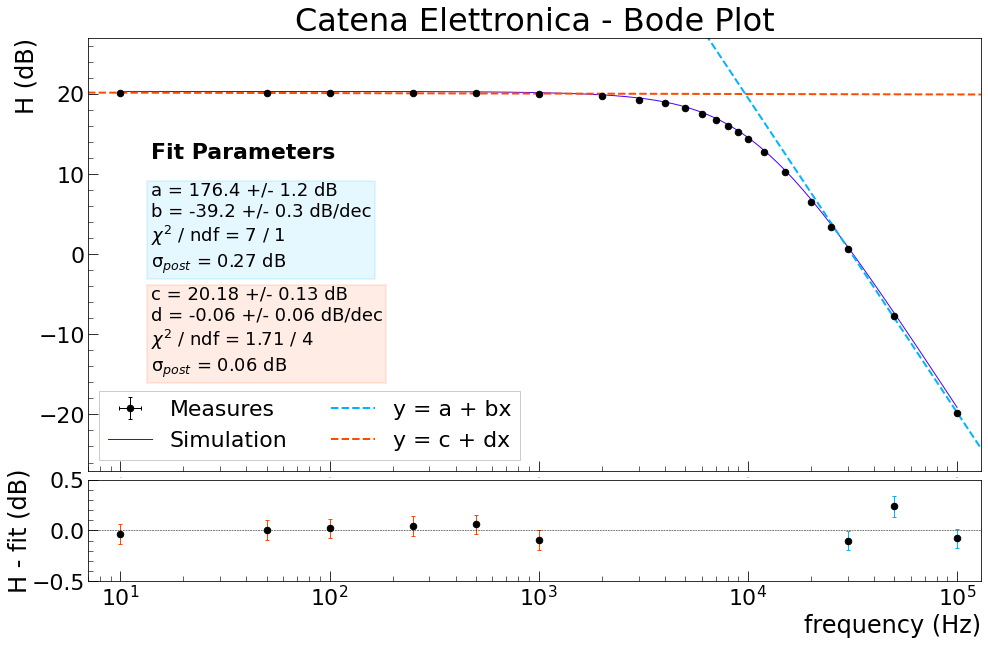

In [86]:
simulation = CA.get_bode_sim('../Simulations/catena/Data/Catena_frequency.txt')
CA.bode_plot(data_out, simulation)

In [78]:
CA.freq_taglio_bode()

Frequenza di Taglio Bode ft_bode = 9.72 +/- 0.13  kHz


In [85]:
importlib.reload(CA)

<module 'Catena_Analysis_Code' from 'd:\\GitHub\\physics_laboratory_2020_2021\\CATENA ELETTRONICA\\Python\\Catena_Analysis_Code.py'>